In [1]:
import pandas as pd
import numpy as np
from geemap import ml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Project\Updated_netcdf\MODIS\modis_full_dataset.csv")
df.describe()

,DEPTH,LATITUDE,LONGITUDE,SALINITY,TEMPERATURE,CPHL,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16
count,459.000000,459.000000,459.000000,459.000000,459.000000,431.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,3.671255,17.813463,13.763921,32.815758,22.075430,0.350385,0.201929,0.115115,0.071078,0.052499,0.036283,0.006702,0.008268,0.004286,0.002624
std,4.015191,28.288599,75.596405,5.823072,8.880249,0.458761,0.183254,0.140187,0.125308,0.107514,0.088960,0.039729,0.040917,0.029155,0.024738
min,0.000199,-21.568310,-158.990000,6.230000,0.434000,-0.000750,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
25%,0.000249,0.651500,-26.036450,32.308002,14.639501,0.080000,0.060300,0.020650,0.002800,-0.003125,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
50%,2.006000,16.835220,11.660300,34.799002,26.575001,0.151000,0.145000,0.075750,0.027300,0.011750,0.004050,-0.004350,-0.004000,-0.004800,-0.004850
75%,5.708460,51.910000,75.282500,36.534002,28.909501,0.463550,0.301700,0.152100,0.087850,0.065750,0.039425,0.002300,0.002950,0.000825,0.000400
max,26.752193,58.880000,91.503000,37.607002,31.066001,3.815000,0.877500,0.890150,0.908700,0.899900,0.630450,0.480150,0.474450,0.259500,0.186050


In [3]:
feature_names = ['sur_refl_b08', 'sur_refl_b09',  'sur_refl_b10',  'sur_refl_b11',  'sur_refl_b12',  'sur_refl_b13',  'sur_refl_b14',  'sur_refl_b15',  'sur_refl_b16']

label = "SALINITY"

In [4]:
X = df[feature_names]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR  

best_n_estimators = 100
best_max_depth = 25
best_min_samples_split = 2
best_min_samples_leaf = 4
best_max_features = 'sqrt'  

rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                               max_depth=best_max_depth, 
                               min_samples_split=best_min_samples_split, 
                               min_samples_leaf=best_min_samples_leaf, 
                               max_features=best_max_features)

# rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


# Calculate RMSE and other metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


# Calculate nRMSE
max_y = y_test.max()
min_y = y_test.min()
nrmse = rmse / (max_y - min_y)

print('RMSE:', rmse)
print('nRMSE:', nrmse)
print('p-value:', p_value)
print('r:', r_value)


observed_values = np.array(y_test)
predicted_values = np.array(y_pred)

# Calculate Mean Error (ME)
mean_error = np.mean(predicted_values - observed_values)

# Calculate Mean Bias Error (MBE)
mbe = np.mean(np.abs(predicted_values - observed_values))

print(f"Mean Error (ME): {mean_error}")
print(f"Mean Bias Error (MBE): {mbe}")

RMSE: 4.50382716781841
nRMSE: 0.18365725861189158
p-value: 2.053914434884862e-11
r: 0.531159260660433
Mean Error (ME): -0.8720525207368645
Mean Bias Error (MBE): 3.2208143542471066


# Model Implimantation

In [6]:
from osgeo import gdal
import numpy as np
import pandas as pd

In [7]:
from osgeo import gdal
import numpy as np


path = r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\MODIS\MODIS_AO_Image.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

In [8]:
print(all_pixel_bands.shape)

(5714, 8087, 9)


In [8]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

In [11]:
# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (46209118, 9)


In [12]:
dff.describe()

,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16
count,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07
mean,1.848371e-02,1.582966e-02,1.119664e-02,7.951149e-03,5.474101e-03,7.809950e-04,1.113917e-03,6.496475e-04,4.545038e-04
std,5.876122e-02,4.937826e-02,3.368757e-02,2.665208e-02,2.006060e-02,8.235448e-03,9.118104e-03,8.555585e-03,7.723189e-03
min,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.700000e-03,3.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.600000e+00,1.600000e+00,3.771000e-01,2.825000e-01,2.207000e-01,1.184000e-01,1.224000e-01,1.128000e-01,1.051000e-01


In [13]:
#array
np_array=dff.to_numpy()
np.save(r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\MODIS\ao_image_data.npy",np_array)

print("Data exported")

Data exported


In [ ]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\MODIS\ao_image_data.npy")
print(new_data[1:,])

In [ ]:
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

In [14]:
# df2 = pd.DataFrame(new_data, columns=columns)
# X_new = df2[columns]

In [13]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

X_new = dff[columns]

In [5]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

NameError: name 'rf' is not defined

In [4]:
print(predictions.shape)

NameError: name 'predictions' is not defined

In [3]:
import numpy as np
data=np.reshape(predictions,(4148, 5051))

NameError: name 'predictions' is not defined

In [12]:

path = r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\MODIS_AO_Image.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

# Create an empty numpy array to store band data for all pixels
all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=column_names)
dff.rename(columns = {"sur_refl_b8" : "sur_refl_b08", "sur_refl_b9" : "sur_refl_b09"},inplace=True)
  

print("Shape of DataFrame:", dff.shape)

#array
#np_array=dff.to_numpy()
print(dff.info())

AttributeError: 'NoneType' object has no attribute 'RasterXSize'

In [10]:
dff.describe()

,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16
count,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07,4.620912e+07
mean,1.848371e-02,1.582966e-02,1.119664e-02,7.951149e-03,5.474101e-03,7.809950e-04,1.113917e-03,6.496475e-04,4.545038e-04
std,5.876122e-02,4.937826e-02,3.368757e-02,2.665208e-02,2.006060e-02,8.235448e-03,9.118104e-03,8.555585e-03,7.723189e-03
min,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.700000e-03,3.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.600000e+00,1.600000e+00,3.771000e-01,2.825000e-01,2.207000e-01,1.184000e-01,1.224000e-01,1.128000e-01,1.051000e-01


In [33]:
columns = ['sur_refl_b08', 'sur_refl_b09',  'sur_refl_b10',  'sur_refl_b11',  'sur_refl_b12',  'sur_refl_b13',  'sur_refl_b14',  'sur_refl_b15',  'sur_refl_b16']
X_new = dff[columns]

MemoryError: Unable to allocate 1.86 GiB for an array with shape (27698604, 9) and data type float64

In [14]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

In [15]:
np.save(r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\SALINITY.npy",predictions)

# Print the predicted values
print(predictions) 

[32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
 32.45625931]


In [17]:
print(all_pixel_bands.shape)
print(predictions.shape)

(5714, 8087, 9)
(46209118,)


In [18]:
data=np.reshape(predictions,(5714, 8087))

In [19]:
print(data.shape) 

(5714, 8087)


In [20]:
print(data)

[[32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
  32.45625931]
 [32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
  32.45625931]
 [32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
  32.45625931]
 ...
 [32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
  32.45625931]
 [32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
  32.45625931]
 [32.45625931 32.45625931 32.45625931 ... 32.45625931 32.45625931
  32.45625931]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import geemap
geemap.ee_initialize()


In [38]:
# salinity_feature = geemap.ee.FeatureCollection([geemap.ee.Feature(None, {'salinity': data.tolist()})])

# # Visualize the predicted salinity map using geemap
# Map = geemap.Map()
# Map.centerObject(salinity_feature, 6)
# Map.addLayer(salinity_feature, {'min': 0, 'max': 40}, 'Predicted Salinity')
# Map

# # Display the matplotlib figure
# plt.imshow(predicted_salinity_map, cmap='viridis', vmin=0, vmax=40)
# plt.colorbar(label='Predicted Salinity')
# plt.title('Predicted Salinity Map')
# plt.show()


In [16]:
from osgeo import gdal
import numpy as np


# path = r"D:\ACADMIA\Project\Project_alpha\MODIS_BOB_cropped.tif"
# dataset = gdal.Open(path)

# # Get image properties
# width = dataset.RasterXSize
# height = dataset.RasterYSize
# num_bands = dataset.RasterCount

# all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

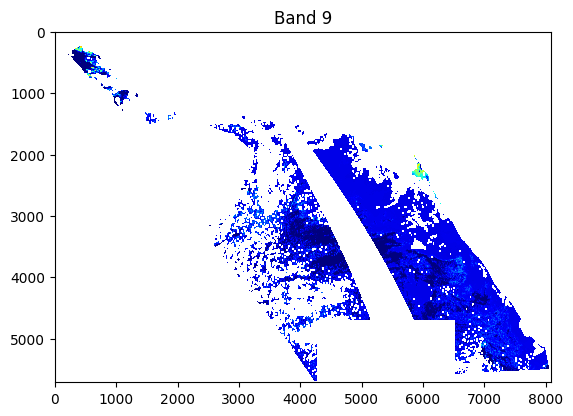

In [16]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [22]:
print(np.shape(band_data))

(5714, 8087)


In [17]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\ao_modis_cropped_image_wc.pdf


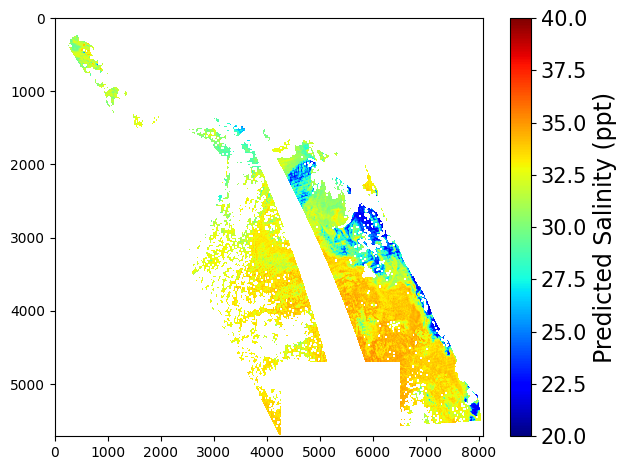

In [19]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'ao_modis_cropped_image_wc.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

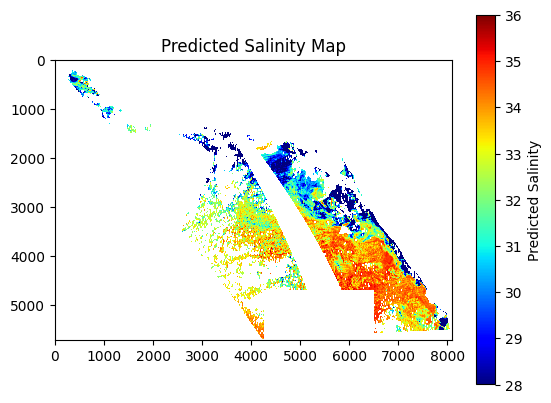

In [24]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data, cmap='jet', vmin=28, vmax=36)
plt.colorbar(label='Predicted Salinity')
plt.title('Predicted Salinity Map')
plt.show()

In [46]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\MODIS\ao_image_data.npy")
print(new_data[1:,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27698604 entries, 0 to 27698603
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sur_refl_b08  float64
 1   sur_refl_b09  float64
 2   sur_refl_b10  float64
 3   sur_refl_b11  float64
 4   sur_refl_b12  float64
 5   sur_refl_b13  float64
 6   sur_refl_b14  float64
 7   sur_refl_b15  float64
 8   sur_refl_b16  float64
dtypes: float64(9)
memory usage: 1.9 GB
None


In [48]:
# Preprocess the new data: select the same features as in the training data
X_new = dff[columns]

In [49]:
# Make predictions using the trained model
predictions = rf.predict(X_new)



In [50]:
data=np.reshape(predictions,(5714, 8087))

ValueError: cannot reshape array of size 27698604 into shape (5714,8087)

In [24]:
from osgeo import gdal
import numpy as np


path = r"D:\ACADMIA\Project\Project_alpha\Arabian_cropped_data\MODIS\MODIS_AO_Image.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

In [25]:
print(all_pixel_bands.shape)
print(predictions.shape)

(5714, 8087, 9)
(27698604,)


In [ ]:
r1 = new_data[:,1]
r1_img = np.reshape(r1, (4091,4865))
plt.figure()
plt.imshow(r1_img, cmap = 'jet' )

In [ ]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [ ]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

In [ ]:
plt.imshow(data, aspect='auto', cmap='jet',vmin=20,vmax=40)
plt.colorbar(label='Predicted Salinity')
plt.title('Predicted Salinity Map(MODIS)')

plt.savefig(r"C:\Users\lenovo\OneDrive\Project\Results\predicted_map_modis_ao_20_40.png" )
plt.show()      

 # Complete Year Composite

In [7]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\SEN3\SEN3_AO_Composite_Mean_March22_Feb23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(584, 421, 21)
